<a href="https://colab.research.google.com/github/Batovs/Parque-Lajeado_Analise-Flora/blob/main/An%C3%A1lise_Flora_Parque_Lajeado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.scientific.sequential import Bamako_16
import textwrap

In [ ]:
def wrap_labels(ax, width, break_long_words=False):
  '''Função para quebrar as legendas dos eixos'''
  labels = []
  for label in ax.get_xticklabels():
      text = label.get_text()
      labels.append(textwrap.fill(text, width=width,
                    break_long_words=break_long_words))
  ax.set_xticklabels(labels, rotation=0)

In [ ]:
url = "https://raw.githubusercontent.com/Batovs/Parque-Lajeado_Analise-Flora/main/Levantamento%20Parque%20lajeado%202021.csv"
url_edit = "https://github.com/Batovs/Parque-Lajeado_Analise-Flora/blob/main/esp_fam_hab_2.csv"

In [ ]:
df = pd.read_csv(url,sep=';',encoding='latin1')
#df_edit = pd.read_csv(url_edit, sep=';')
#df_edit

In [ ]:
#Dicinários das Legendas
#Legenda Hábito
habito = {
          'arb':'arbusto', 'árv':'árvore', 'avt':'arvoreta',
          'b':'bambu', 'dr':'dracenoide', 'eces':'erva cespitosa',
          'ee':'erva ereta', 'eriz':'erva rizomatosa',
          'fa': 'feto arborescente', 'he':'hemiepifita',
          'pc':'palmeira cespitoso', 'pu':'palmeira único', 'tr':'trepadeira',
          'suba':'subarousto', 'eros':'erva rosulada', 'era':'erva rastejante'
        }

#Legenda Fonte de Dados
fonte_dados = {'V':'Vistoria sem inclusão',
               'H':'Amostra incluída no Herbário Municipal'}

#Legenda Origem
origem = {
          'n': 'nativa no município de São Paulo',
          'c': 'exótica cultivada',
          'd': 'dúvida se é nativa no MSP',
          's': 'exótica subespontânea',
          'i': 'exótica invasora',
          }




In [ ]:
df = df.replace({'hábito':habito})
df = df.replace({'fonte de dados':fonte_dados})
df = df.replace({'origem':origem})

In [ ]:
df

,Parque Lajeado - Izaura Pereira de Souza Franzolin. Flora: última atualização do Herbário Municipal (PMSP) em 15/07/2021\nGRUPO / FAMÍLIA / Espécie,nome popular,fonte de dados,hábito,status de conservação,origem,guia
0,ANGIOSPERMAS,NaN,NaN,NaN,NaN,NaN,NaN
1,ACANTHACEAE,NaN,NaN,NaN,NaN,NaN,NaN
2,Eranthemum pulchellum Andrews,camarão-azul,Vistoria sem inclusão,erva ereta,NaN,exótica cultivada,NaN
3,Odontonema tubaeforme (Bertol.) Kuntze,odontonema,Amostra incluída no Herbário Municipal,arbusto,NaN,exótica cultivada,NaN
4,Sanchezia oblonga Ruiz & Pav.,sanquésia,Vistoria sem inclusão,arbusto,NaN,exótica cultivada,NaN
...,...,...,...,...,...,...,...
175,Neoblechnum brasiliense (Desv.) Gasper & V.A.O...,samambaia-do- brejo,Vistoria sem inclusão,erva rosulada,NaN,nativa no município de São Paulo,NaN
176,CYATHEACEAE,NaN,NaN,NaN,NaN,NaN,NaN
177,Cyathea sp.,samambaiuçu,Vistoria sem inclusão,feto arborescente,NaN,nativa no município de São Paulo,NaN
178,LYGODIACEAE,NaN,NaN,NaN,NaN,NaN,NaN


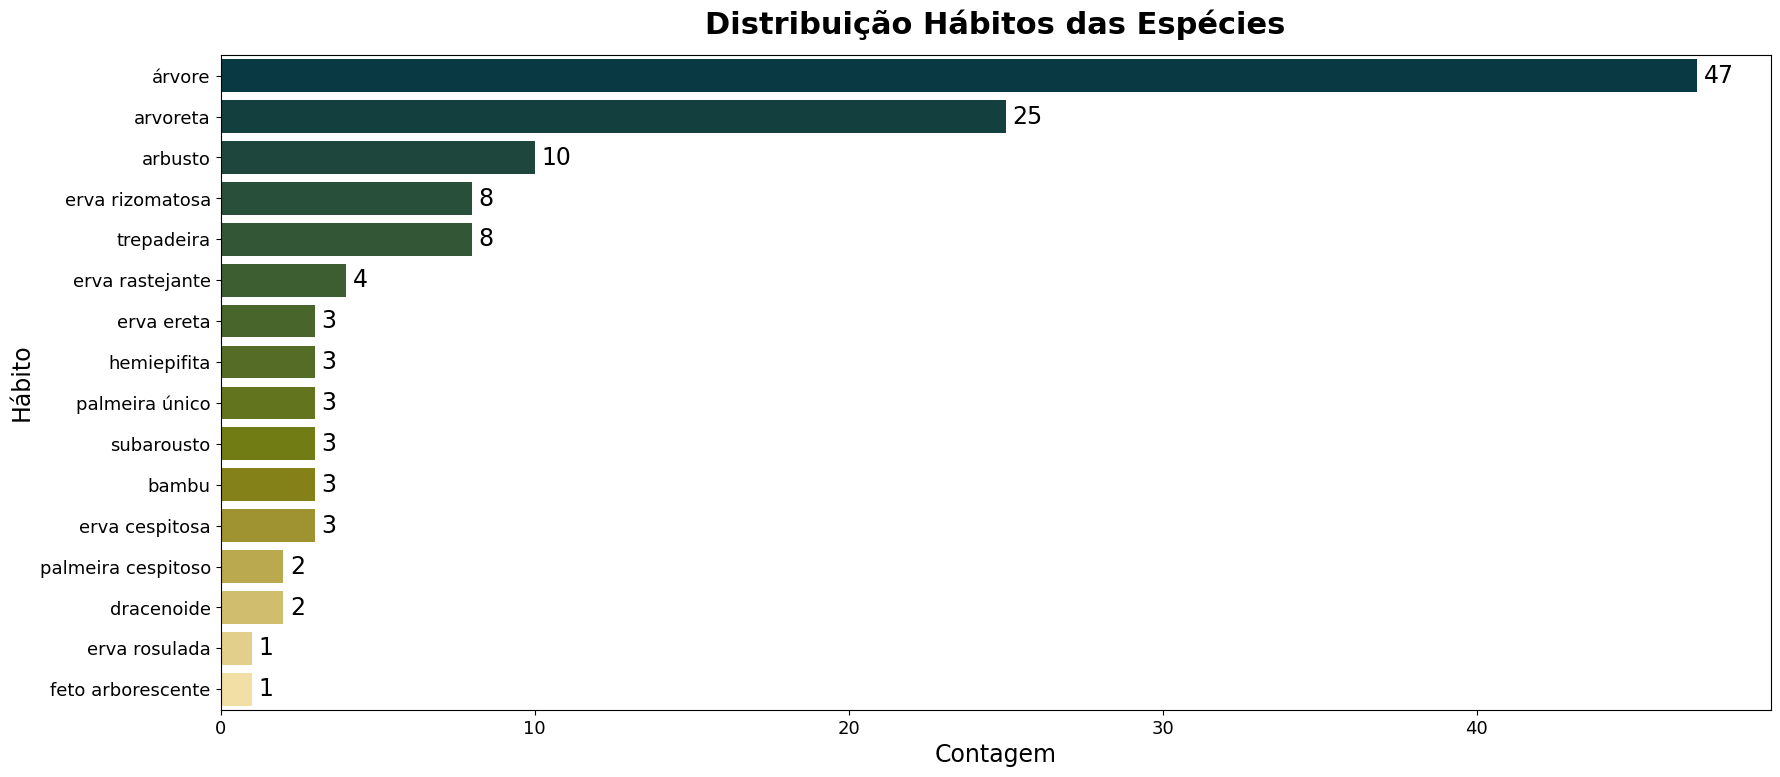

In [ ]:
from palettable.scientific.sequential import Bamako_16 #Paleta de cores
#https://jiffyclub.github.io/palettable/


#Gráfico de Barras dos hábitos
fig, ax = plt.subplots(figsize=(20,8.5))
valores = df['hábito'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
ax = sns.barplot(data=valores, x='hábito', y='index', palette=Bamako_16.mpl_colors)

# Adicionar rótulos e título
plt.xlabel('Contagem', fontsize=17)
plt.ylabel('Hábito', fontsize=17)
plt.title('Distribuição Hábitos das Espécies', weight = 'bold', fontsize=22, pad=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=17)



plt.savefig('Distribuição Hábitos das Espécies')
plt.show()

In [ ]:
valores = df['hábito'].dropna().value_counts()
valores

árvore                47
arvoreta              25
arbusto               10
erva rizomatosa        8
trepadeira             8
erva rastejante        4
erva ereta             3
hemiepifita            3
palmeira único         3
subarousto             3
bambu                  3
erva cespitosa         3
palmeira cespitoso     2
dracenoide             2
erva rosulada          1
feto arborescente      1
Name: hábito, dtype: int64

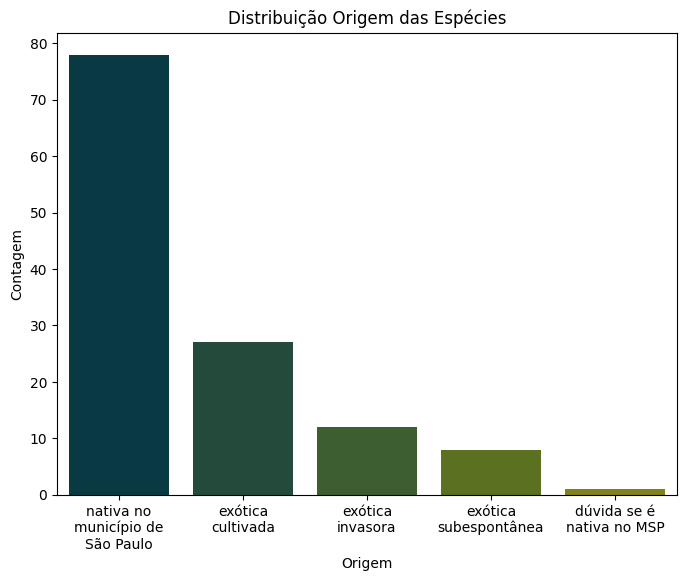

In [ ]:
#Gráfico de Barras da Origem
from palettable.scientific.sequential import Bamako_7 #Paleta de cores

fig, ax = plt.subplots(figsize=(8,6))
valores = df['origem'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
sns.barplot(data=valores, x='index', y='origem', palette=Bamako_7.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Origem')
plt.ylabel('Contagem')
plt.title('Distribuição Origem das Espécies')

# Quebrar as legendas do eixo X
wrap_labels(ax, 15)

plt.savefig('Distribuição Origem das Espécies')
plt.show()

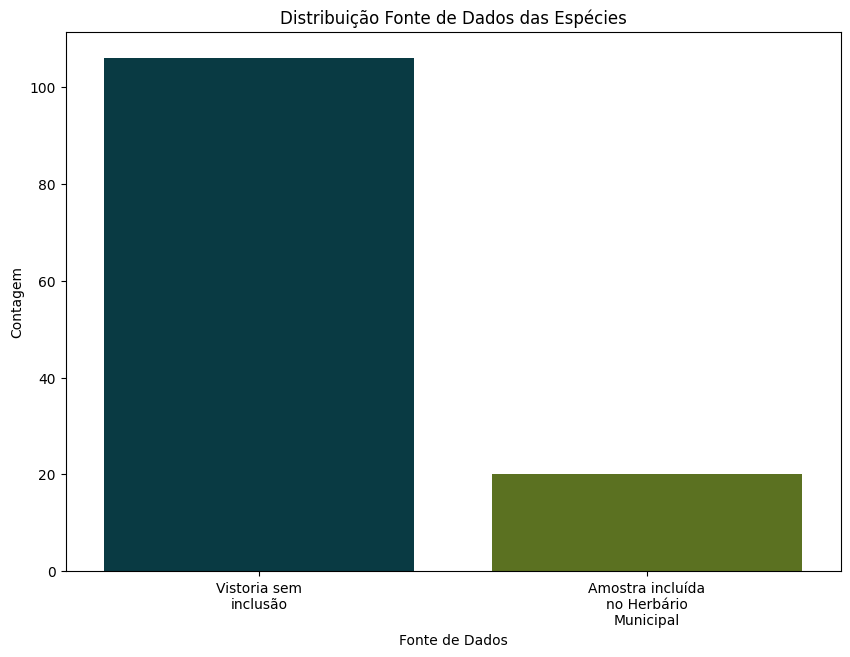

In [ ]:
#Gráfico de Barras da Fonte de dados
from palettable.scientific.sequential import Bamako_3 #Paleta de cores

fig, ax = plt.subplots(figsize=(10,7))
valores = df['fonte de dados'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
sns.barplot(data=valores, x='index', y='fonte de dados', palette=Bamako_3.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Fonte de Dados')
plt.ylabel('Contagem')
plt.title('Distribuição Fonte de Dados das Espécies')

# Quebrar as legendas do eixo X
wrap_labels(ax, 17)

plt.savefig('Distribuição Fonte de Dados das Espécies')
plt.show()

In [ ]:
df_arv = df[df['hábito'] == 'árvore']
df_arv

,Parque Lajeado - Izaura Pereira de Souza Franzolin. Flora: última atualização do Herbário Municipal (PMSP) em 15/07/2021\nGRUPO / FAMÍLIA / Espécie,nome popular,fonte de dados,hábito,status de conservação,origem,guia
6,Mangifera indica L.,mangueira,Vistoria sem inclusão,árvore,NaN,exótica subespontânea,X
7,Schinus terebinthifolia Raddi,aroeira-mansa,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,X
9,Guatteria australis A.St.-Hil.,pindaíba,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN
33,Cordia magnoliifolia Cham.,grão-de-galo,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN
35,Protium sp.,NaN,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN
37,Cinnamodendron dinisii Schwacke,"pimenteira, pau-para-tudo",Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN
47,Alchornea sidifolia Müll.Arg.,tapiá-guaçu,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,X
48,Croton floribundus Spreng.,capixingui,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN
52,Holocalyx balansae Micheli,alecrim-de- campinas,Vistoria sem inclusão,árvore,NaN,exótica cultivada,NaN
53,Hymenaea courbaril L.,jatobá,Vistoria sem inclusão,árvore,NaN,nativa no município de São Paulo,NaN


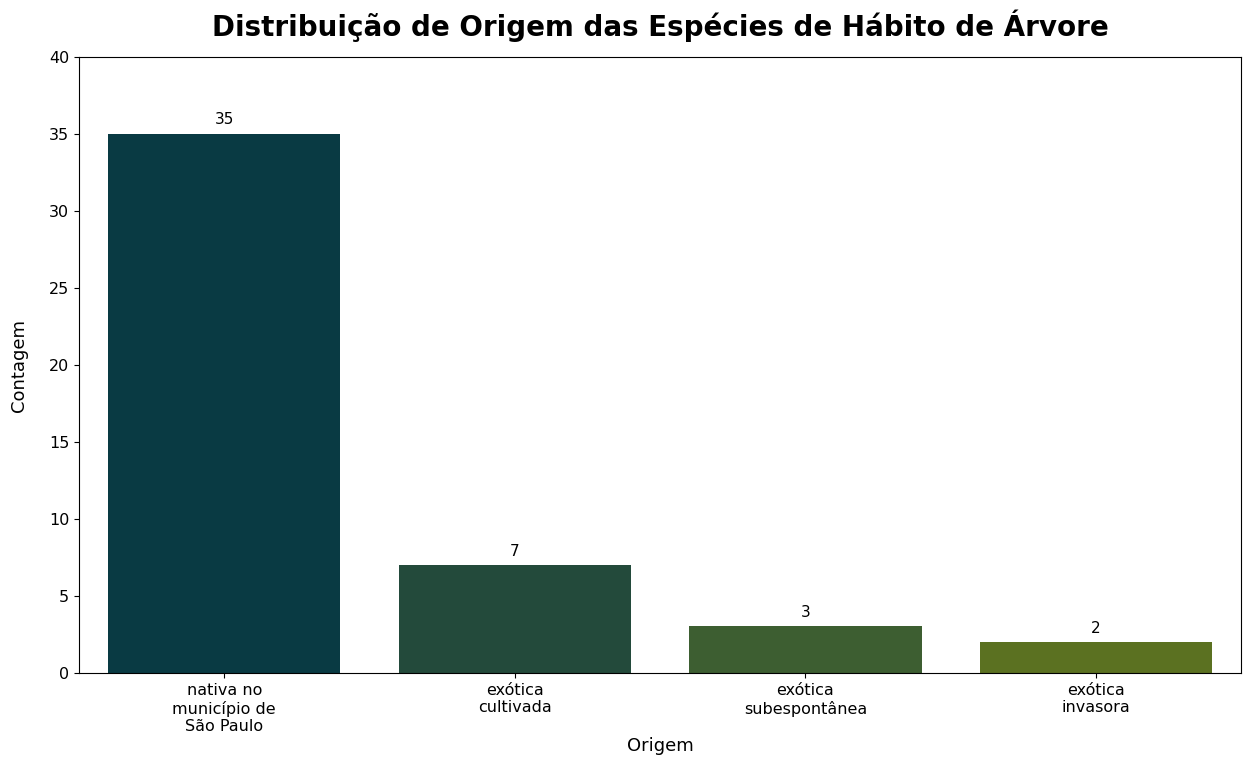

In [ ]:
#Gráfico de Barras da Origem
from palettable.scientific.sequential import Bamako_7 #Paleta de cores

fig, ax = plt.subplots(figsize=(15,8))
valores = df_arv['origem'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
ax = sns.barplot(data=valores, x='index', y='origem', palette=Bamako_7.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Origem', fontsize=13, labelpad=2)
plt.ylabel('Contagem', fontsize=13, labelpad=15)
plt.title('Distribuição de Origem das Espécies de Hábito de Árvore', weight = 'bold', fontsize=20, pad=15)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=11)
plt.ylim([0, 40])

# Quebrar as legendas do eixo X
wrap_labels(ax, 15)

plt.savefig('Distribuição Origem das Espécies Árvores')
plt.show()

<ipython-input-15-769023511e01>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arvore = arvore.append(nova_linha, ignore_index=True)


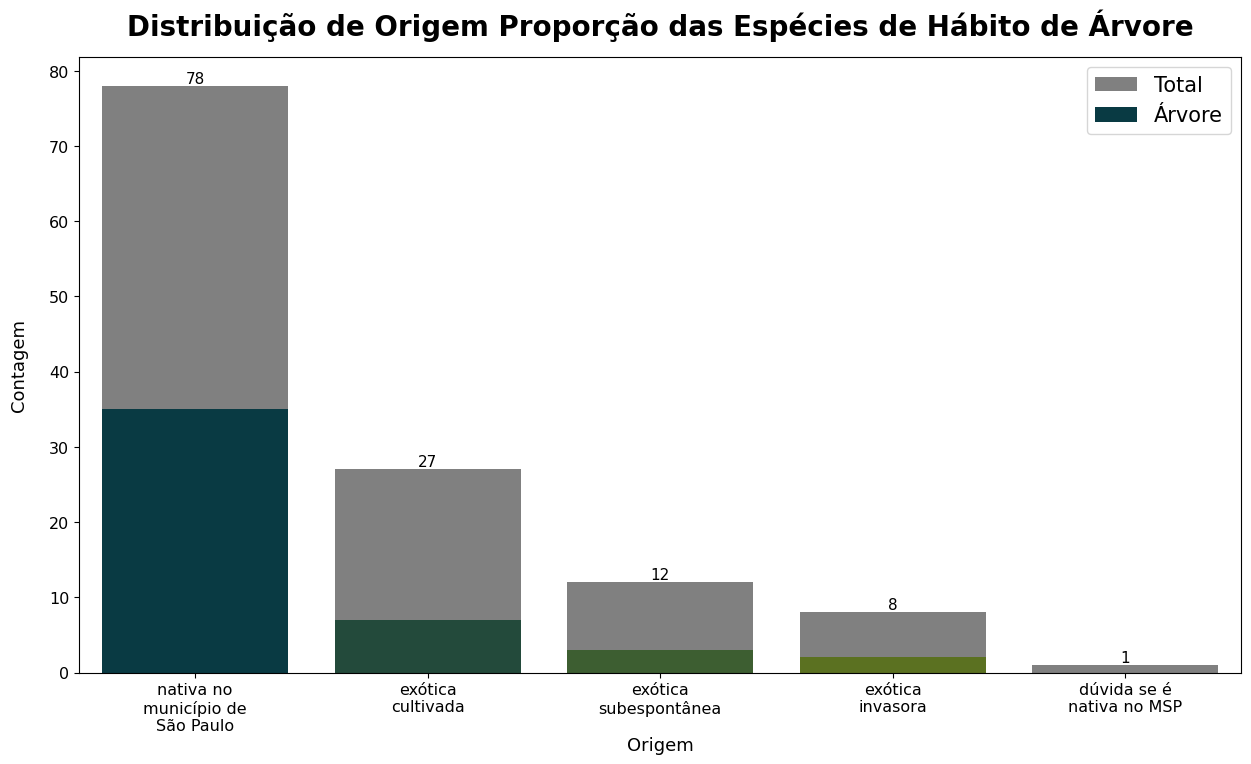

In [ ]:
total = df['origem'].dropna().value_counts().reset_index()
arvore = df_arv['origem'].dropna().value_counts().reset_index()
nova_linha = {'index':'dúvida se é nativa no MSP', 'origem':0}
arvore = arvore.append(nova_linha, ignore_index=True)

#Gráfico de Barras da Origem Com árvore e total
from palettable.scientific.sequential import Bamako_7 #Paleta de cores

fig, ax = plt.subplots(figsize=(15,8))


# Criar o gráfico de colunas com seaborn

ax1 = sns.barplot(data=total, x='index', y='origem', color='gray', label='Total')

ax2 = sns.barplot(data=arvore, x='index', y='origem', palette=Bamako_7.mpl_colors, label="Árvore")
ax2.bar_label(ax2.containers[0], fontsize=11, label_type='edge')



# Adicionar rótulos e título
plt.xlabel('Origem', fontsize=13, labelpad=2)
plt.ylabel('Contagem', fontsize=13, labelpad=15)
plt.title('Distribuição de Origem Proporção das Espécies de Hábito de Árvore', weight = 'bold', fontsize=20, pad=15)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)

ax.legend(loc='upper right', fontsize=15)

# Quebrar as legendas do eixo X
wrap_labels(ax, 15)

plt.savefig('Distribuição Origem Proporção das Espécies Árvores')
plt.show()





In [ ]:
#dados familia myrtacae
dados = {'col1':['Espécies BR', 'Espécies SP','Gêneros BR','Gêneros SP'], 'col2':[1116, 385, 24, 20]}
df_myrtacae = pd.DataFrame(data=dados)
df_myrtacae

,col1,col2
0,Espécies BR,1116
1,Espécies SP,385
2,Gêneros BR,24
3,Gêneros SP,20


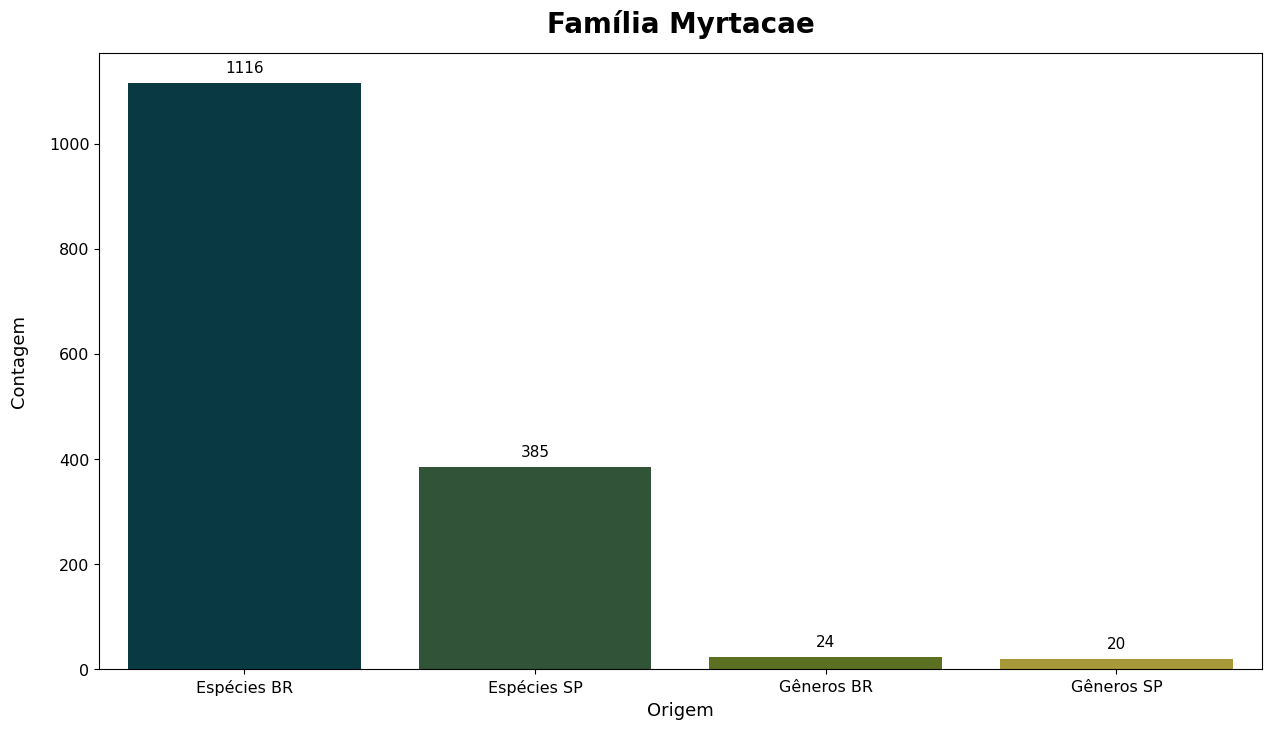

In [ ]:
#Gráfico de Barras da Família Myrtacae
from palettable.scientific.sequential import Bamako_5 #Paleta de cores

fig, ax = plt.subplots(figsize=(15,8))
valores = df_myrtacae


# Criar o gráfico de colunas com seaborn
ax = sns.barplot(data=valores, x='col1', y='col2', palette=Bamako_5.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Origem', fontsize=13, labelpad=5)
plt.ylabel('Contagem', fontsize=13, labelpad=15)
plt.title('Família Myrtacae', weight = 'bold', fontsize=20, pad=15)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=11)


plt.savefig('Família Myrtacae')
plt.show()

In [ ]:
#dados familia fabacea
dados = {'col1':['Espécies BR', 'Espécies SP','Gêneros BR','Gêneros SP'], 'col2':[1455, 286, 160, 84]}
df_fabaceae = pd.DataFrame(data=dados)
df_fabaceae

,col1,col2
0,Espécies BR,1455
1,Espécies SP,286
2,Gêneros BR,160
3,Gêneros SP,84


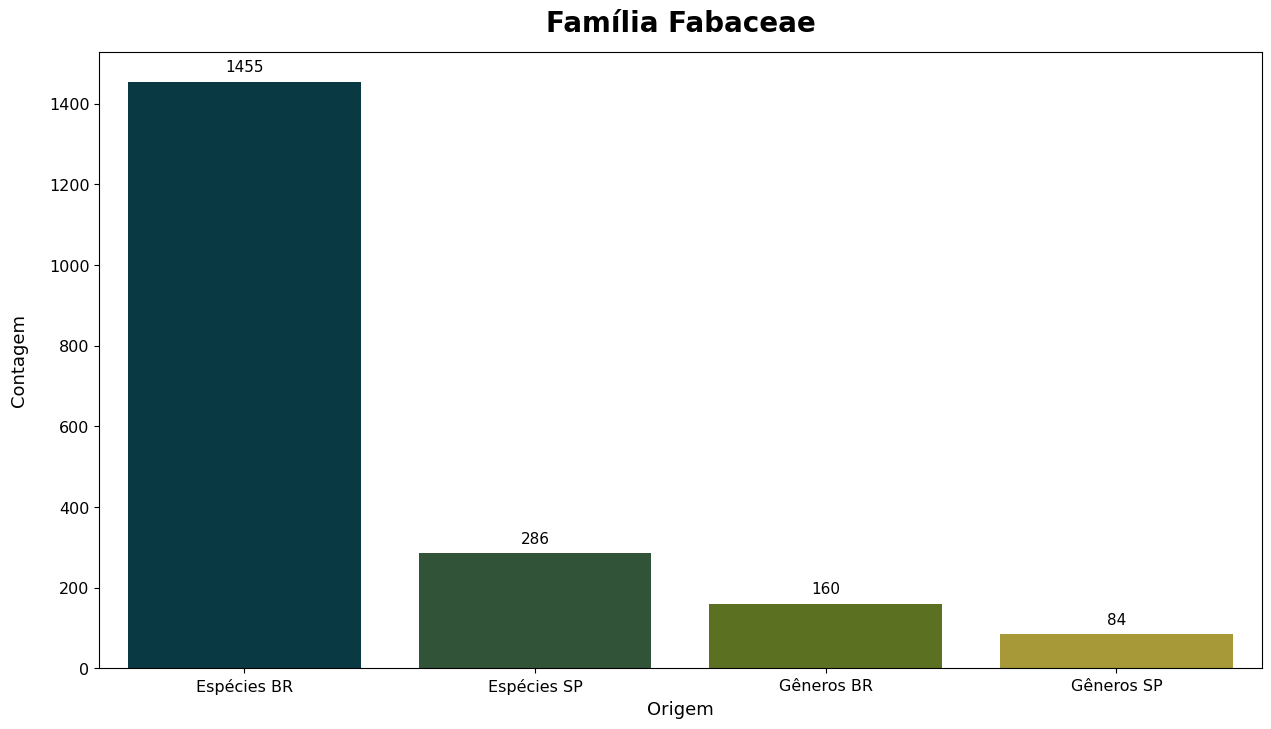

In [ ]:
#Gráfico de Barras da Família Fabaceae
from palettable.scientific.sequential import Bamako_5 #Paleta de cores

fig, ax = plt.subplots(figsize=(15,8))
valores = df_fabaceae


# Criar o gráfico de colunas com seaborn
ax = sns.barplot(data=valores, x='col1', y='col2', palette=Bamako_5.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Origem', fontsize=13, labelpad=5)
plt.ylabel('Contagem', fontsize=13, labelpad=15)
plt.title('Família Fabaceae', weight = 'bold', fontsize=20, pad=15)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=11)


plt.savefig('Família Fabaceae')
plt.show()

In [ ]:
#dados familias mais representativas
url_repr = 'https://raw.githubusercontent.com/Batovs/Parque-Lajeado_Analise-Flora/main/Familias_repr.csv'
df_repr = pd.read_csv(url_repr,sep=',')
df_repr

,Família,Espécie
0,ANACARDIACEAE,Mangifera indica L.
1,ANACARDIACEAE,Schinus terebinthifolia
2,ANNONACEAE,Guatteria australis
3,ARAUCARIACEAE,Araucaria angustifolia
4,BORAGINACEAE,Cordia magnoliifolia
5,BURSERACEAE,Protium sp.
6,CANELLACEAE,Cinnamodendron dinisii
7,EUPHORBIACEAE,Croton floribundus
8,EUPHORBIACEAE,Alchornea sidifolia
9,FABACEAE,Holocalyx balansae


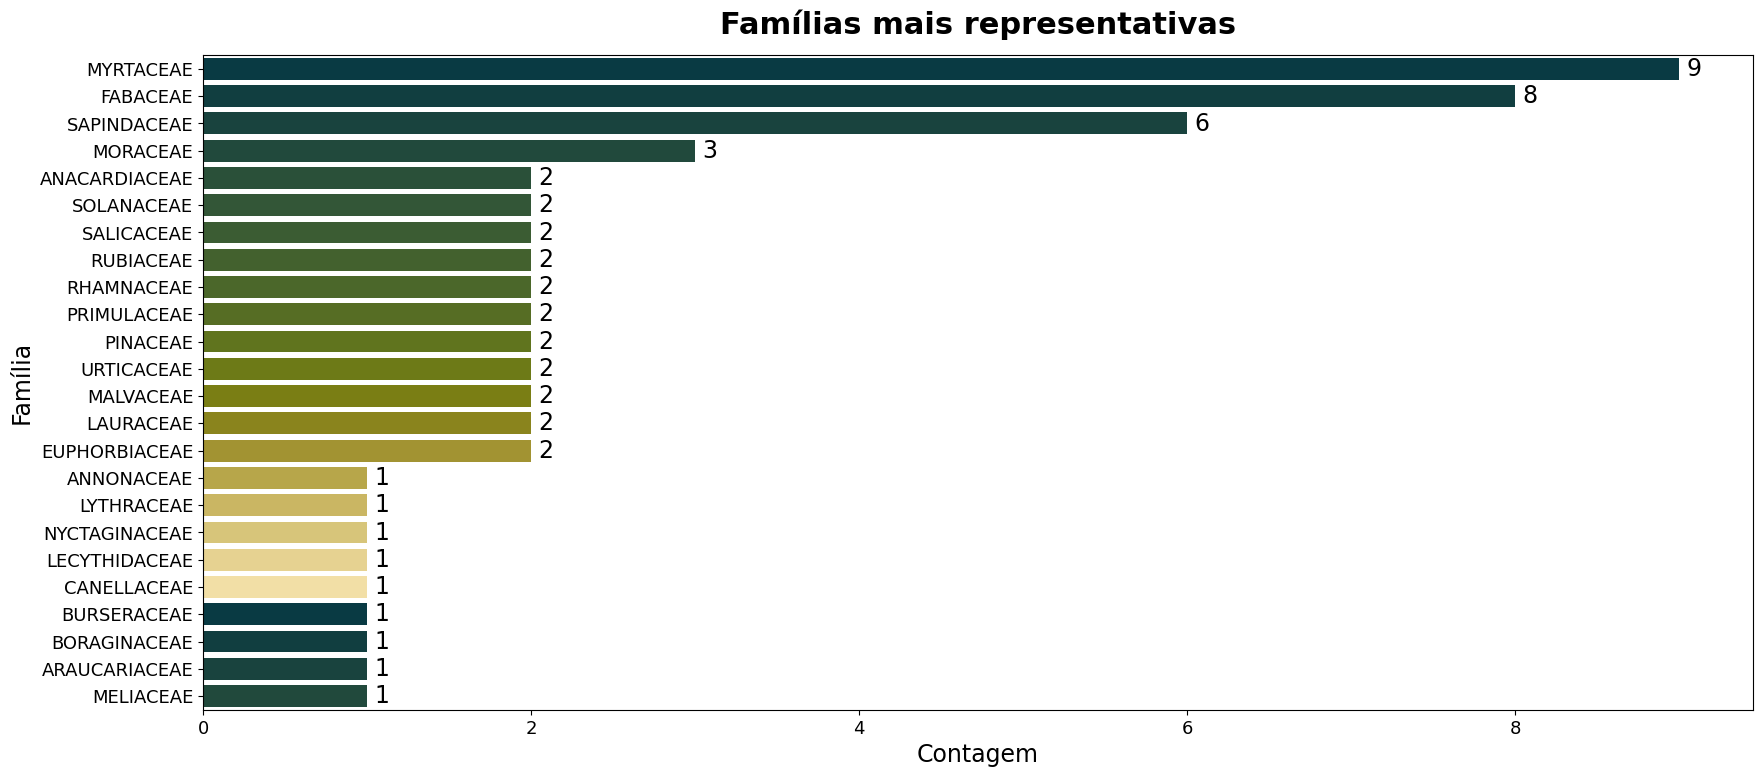

In [ ]:
 from palettable.scientific.sequential import Bamako_20 #Paleta de cores
#https://jiffyclub.github.io/palettable/


#Gráfico das famílias mais representativas
fig, ax = plt.subplots(figsize=(20,8.5))
valores = df_repr['Família'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
ax = sns.barplot(data=valores, x='Família', y='index', palette=Bamako_20.mpl_colors)

# Adicionar rótulos e título
plt.xlabel('Contagem', fontsize=17)
plt.ylabel('Família', fontsize=17)
plt.title('Famílias mais representativas', weight = 'bold', fontsize=22, pad=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=17)



plt.savefig('Famílias mais representativas')
plt.show()

In [ ]:
valores = df_repr['Família'].dropna().value_counts().reset_index()
valores

,index,Família
0,MYRTACEAE,9
1,FABACEAE,8
2,SAPINDACEAE,6
3,MORACEAE,3
4,ANACARDIACEAE,2
5,SOLANACEAE,2
6,SALICACEAE,2
7,RUBIACEAE,2
8,RHAMNACEAE,2
9,PRIMULACEAE,2
